## K-means 기법

### 2차원 입력 데이터

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 데이터 생성 하기
np.random.seed(1)
N = 100
K = 3
T3 = np.zeros((N, 3), dtype=np.uint8)
X = np.zeros((N, 2))
X_range0 = [-3, 3]
X_range1 = [-3, 3]
X_col = ['cornflowerblue', 'black', 'white']
Mu = np.array([[-.5, -.5], [.5, 1.0], [1, -.5]]) # 분포 중심
Sig = np.array([[.7, .7], [.8, .3], [.3, .8]]) # 분포 분산
Pi = np.array([0.4, 0.8, 1]) # 누적 확률
for n in range(N):
    wk = np.random.rand() # 0~1 사이의 랜덤값
    for k in range(K):
        if wk < Pi[k]:
            T3[n, k] = 1
            break
    for k in range(2):
        X[n, k] = (np.random.randn() * Sig[T3[n, : ] == 1, k]
                  + Mu[T3[n, :] == 1, k])

In [2]:
# 데이터 그리기
def show_data(x):
    plt.plot(x[:, 0], x[:, 1], linestyle = 'none',
            marker = 'o', markersize = 6,
            markeredgecolor = 'black', color = 'gray', alpha = 0.8)
    plt.grid(True)

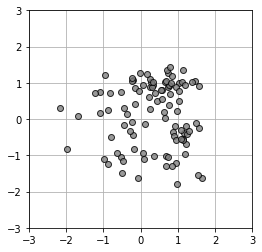

In [3]:
# 메인
plt.figure(1, figsize=(4,4))
show_data(X)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.show()
np.savez('data_ch9.npz', X=X, X_range0=X_range0,
        X_range1=X_range1)

### step0: 변수의 준비와 초기화

In [12]:
# ----------------- 리스트 9-1-(2)
# Mu 및 R 초기화 -----------------------------
Mu = np.array([[-2, 1], [-2, 0], [-2, -1]]) # (A)
R = np.c_[np.ones((N, 1), dtype=int), np.zeros((N, 2), dtype=int)] # (B)

In [13]:
# 데이터 그리는 함수
def show_prm(x, r, mu, col):
    for k in range(K):
        # 데이터 분포 묘사하기
        plt.plot(x[r[:, k] == 1, 0], x[r[:, k] == 1, 1],
                marker = 'o', markerfacecolor = X_col[k], markeredgecolor='k',
                markersize = 6, alpha = 0.5, linestyle = 'none')
        # 데이터의 평균을 '별표'로 묘사하기
        plt.plot(mu[k, 0], mu[k, 1], marker = '*',
                markerfacecolor = X_col[k], markersize = 15,
                markeredgecolor = 'k', markeredgewidth = 1)
    plt.xlim(X_range0)
    plt.ylim(X_range1)
    plt.grid(True)

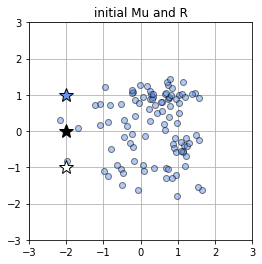

In [14]:
plt.figure(figsize=(4,4))
R = np.c_[np.ones((N,1)), np.zeros((N, 2))]
show_prm(X, R, Mu, X_col)
plt.title('initial Mu and R')
plt.show()

### step 1: R 갱신하기

In [15]:
# r 정하기

def step1_kmeans(x0, x1, mu):
    N = len(x0)
    r = np.zeros((N, K))
    for n in range(N):
        wk = np.zeros(K)
        for k in range(K):
            wk[k] = (x0[n] - mu[k, 0])**2 + (x1[n] - mu[k, 1])**2
        r[n, np.argmin(wk)] = 1
    return r    

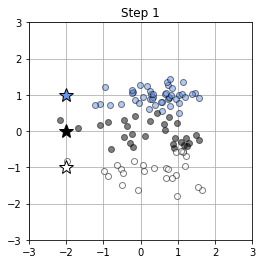

In [16]:
plt.figure(figsize=(4,4))
R = step1_kmeans(X[:,0], X[:, 1], Mu)
show_prm(X, R, Mu, X_col)
plt.title('Step 1')
plt.show()

### step 2: Mu 갱신하기
- k-means 기법에 의한 클러스터링 과정
- step1과 step2의 절차를 반복함. 변수의 값이 변화하지 않으면 프로그램 종료함.

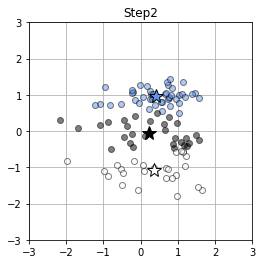

In [17]:
def step2_kmeans(x0, x1, r):
    mu = np.zeros((K, 2))
    for k in range(K):
        mu[k, 0] = np.sum(r[:, k] * x0)/ np.sum(r[:, k])
        mu[k, 1] = np.sum(r[:, k] * x1)/ np.sum(r[:, k])
    return mu

plt.figure(figsize=(4, 4))
Mu = step2_kmeans(X[:, 0], X[:, 1], R)
show_prm(X, R, Mu, X_col)
plt.title('Step2')
plt.show()

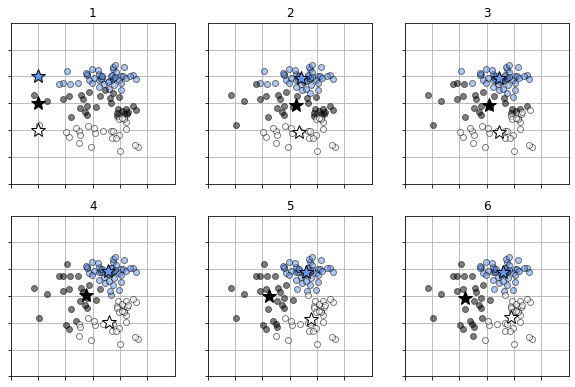

In [27]:
plt.figure(1, figsize = (10, 6.5))

Mu = np.array([[-2, 1], [-2, 0], [-2, -1]])
max_it = 6 # 반복 횟수
for it in range(0, max_it):
    plt.subplot(2, 3, it + 1)
    R = step1_kmeans(X[:, 0], X[:, 1], Mu)
    show_prm(X, R, Mu, X_col)
    plt.title("{0:d}".format(it + 1))
    plt.xticks(range(X_range0[0], X_range0[1]), "")
    plt.yticks(range(X_range1[0], X_range0[1]), "")
    Mu = step2_kmeans(X[:, 0], X[:, 1], R)
plt.show()

### 왜곡 척도
- 프로그램 실행시키면, 초기값의 왜곡척도 표시됨.
- 이 함수로 k-means기법의 반보에 의한 왜곡 척도를 계산함.

In [33]:
# 목적 함수
def distortion_measure(x0, x1, r, mu):
    # 입력은 2차원으로 제한하고 있음.
    N = len(x0)
    J = 0
    for n in range(N):
        for k in range(K
                      ):
            J = J + r[n, k] * ((x0[n] - mu[k, 0])**2
                              +(x1[n] - mu[k, 1])**2)
    return J

# test
# Mu와 R의 초기화
Mu = np.array([[-2, 1], [-2, 0], [-2, -1]])
R = np.c_[np.ones((N, 1), dtype=int), np.zeros((N,2), dtype=int)]
distortion_measure(X[:,0], X[:,1], R, Mu)

771.7091170334878

[627.54  73.39  70.39  57.59  48.31  47.28  46.86  46.86  46.86  46.86]


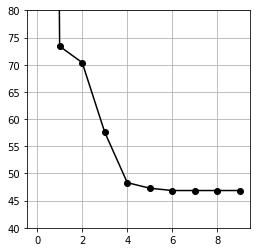

In [35]:
# Mu와 R의 초기화
N = X.shape[0]
K = 3
Mu = np.array([[-2,1], [-2,0], [-2, -1]])
R = np.c_[np.ones((N,1), dtype = int), np.zeros((N, 2), dtype = int)]
max_it = 10
it = 0
DM = np.zeros(max_it) # 왜곡 척도의 계산 결과 넣기
for it in range(0, max_it):
    R = step1_kmeans(X[:,0], X[:,1], Mu)
    DM[it] = distortion_measure(X[:,0], X[:, 1], R, Mu) # 왜곡 척도
    Mu = step2_kmeans(X[:,0], X[:,1], R)
print(np.round(DM, 2))
plt.figure(1, figsize=(4,4))
plt.plot(DM, color = 'black', linestyle = '-', marker = 'o')
plt.ylim(40, 80)
plt.grid(True)
plt.show()

In [18]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [19]:
import numpy as np
wk = np.load('data_ch9.npz')
X = wk['X']
X_range0 = wk['X_range0']
X_range1 = wk['X_range1']

In [20]:
# 가우스함수 생성
def gauss(x, mu, sigma):
    N, D = x.shape
    c1 = 1 / (2*np.pi)**(D / 2)
    c2 = 1 / (np.linalg.det(sigma)**(1 / 2)) # 행렬식
    inv_sigma = np.linalg.inv(sigma) # 역행렬
    c3 = x - mu
    c4 = np.dot(c3, inv_sigma)
    c5 = np.zeros(N)
    for d in range(D):
        c5 = c5 + c4[:, d] * c3[:, d]
    p = c1 * c2 * np.exp(-c5 / 2)
    return p

In [21]:
x = np.array([[1, 2], [2, 1], [3, 4]])
mu = np.array([1, 2])
sigma = np.array([[1, 0], [0, 1]])
print(gauss(x, mu, sigma))

[0.15915494 0.05854983 0.00291502]


In [38]:
# 혼합 가우시안 모델
def mixgauss(x, pi, mu, sigma):
    N, D = x.shape
    K = len(pi)
    p = np.zeros(N)
    for k in range(K):
        p = p + pi[k] * gauss(x, mu[k, :], sigma[k, :, :])
    return p

In [39]:
# test
x = np.array([[1, 2], [2, 2], [3, 4]])
pi = np.array([0.3, 0.7])
mu = np.array([[1, 1], [2, 2]]) # 분포중심
sigma = np.array([[[1, 0], [0, 1]], [[2, 0], [0, 1]]]) # 분포분산
print(mixgauss(x, pi, mu, sigma))

[0.09031182 0.09634263 0.00837489]


In [47]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline

# 혼합 가우스 등고선 표시
def show_contour_mixgauss(pi, mu, sigma):
    xn = 40 # 등고선 표시 해상도
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)
    xx0, xx1 = np.meshgrid(x0, x1)
    x = np.c_[np.reshape(xx0, xn * xn, 'F'), np.reshape(xx1, xn * xn, 'F')]
    f = mixgauss(x, pi, mu, sigma)
    f = f.reshape(xn, xn)
    f = f.T
    plt.contour(x0, x1, f, 10, colors='gray')
    
# 혼합 가우스 3D 표시
def show3d_mixgauss(ax, pi, mu, sigma):
    xn = 40 # 등고선 표시 해상도
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)
    xx0, xx1 = np.meshgrid(x0, x1)
    x = np.c_[np.reshape(xx0, xn * xn, 'F'), np.reshape(xx1, xn * xn, 'F')]
    f = mixgauss(x, pi, mu, sigma)
    f = f.reshape(xn, xn)
    f = f.T
    ax.plot_surface(xx0, xx1, f, rstride=2, cstride=2, alpha=0.3,
                    color='blue', edgecolor='black')

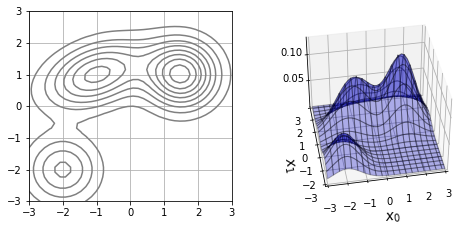

In [48]:
# test
pi = np.array([0.2, 0.4, 0.4])
mu = np.array([[-2, -2], [-1, 1], [1.5, 1]])
sigma = np.array(
    [[[.5, 0], [0, .5]], [[1, 0.25], [0.25, .5]], [[.5, 0], [0, .5]]])


Fig = plt.figure(1, figsize=(8, 3.5))
Fig.add_subplot(1, 2, 1)
show_contour_mixgauss(pi, mu, sigma)
plt.grid(True)


Ax = Fig.add_subplot(1, 2, 2, projection='3d')
show3d_mixgauss(Ax, pi, mu, sigma)
Ax.set_zticks([0.05, 0.10])
Ax.set_xlabel('$x_0$', fontsize=14)
Ax.set_ylabel('$x_1$', fontsize=14)
Ax.view_init(40, -100)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.show()